### Import libraries

In [1170]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [1230]:
# Read in file
df = pd.read_json('../logins.json')

## Part 1. Exploratory data analysis

In [1172]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [1173]:
df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [1174]:
df.shape

(93142, 1)

In [1175]:
df.dtypes

login_time    datetime64[ns]
dtype: object

In [1176]:
# Enforce datetime dtype and sort dates
df['login_time'] = pd.to_datetime(df['login_time'])
df = df.sort_values('login_time')

In [1177]:
# Set index
df = df.set_index('login_time')

In [1178]:
# Aggregate to 15 minute intervals of login counts
login_15_min_intervals = df.resample('15min').size()
login_15_min_intervals

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
                      ..
1970-04-13 17:45:00    5
1970-04-13 18:00:00    5
1970-04-13 18:15:00    2
1970-04-13 18:30:00    7
1970-04-13 18:45:00    6
Freq: 15min, Length: 9788, dtype: int64

In [1179]:
df

""
login_time
1970-01-01 20:12:16
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:36
1970-01-01 20:16:37
...
1970-04-13 18:48:52
1970-04-13 18:50:19
1970-04-13 18:54:02


In [1180]:
login_15_min_intervals.index.diff().value_counts()

login_time
0 days 00:15:00    9787
Name: count, dtype: int64

Data Quality
- The dataset begins at 1970-01-01 20:12:16 and ends at 1970-04-13 18:57:38, meaning the first and last calendar days represent partial observation periods. These partial days will be excluded from daily level aggregate statistics to prevent distortion.
- After resampling to 15-minute intervals, the time index was verified to be perfectly continuous, with all consecutive timestamps separated by exactly 15 minutes and no missing intervals.
- The raw timestamps required sorting prior to aggregation

No major quality issues identified. 

In [1181]:
daily_agg = login_15_min_intervals.resample('D').sum()
daily_agg

login_time
1970-01-01     112
1970-01-02     681
1970-01-03     793
1970-01-04     788
1970-01-05     459
              ... 
1970-04-09     818
1970-04-10    1009
1970-04-11    1352
1970-04-12    1409
1970-04-13     395
Freq: D, Length: 103, dtype: int64

In [1182]:
# full day aggregation, drop first and last days
daily_full = daily_agg[1:-1]
daily_full

login_time
1970-01-02     681
1970-01-03     793
1970-01-04     788
1970-01-05     459
1970-01-06     536
              ... 
1970-04-08     698
1970-04-09     818
1970-04-10    1009
1970-04-11    1352
1970-04-12    1409
Freq: D, Length: 101, dtype: int64

In [1183]:
# 7-day rolling average of login counts
rolling_weekly_mean = daily_full.rolling(window=7).mean()

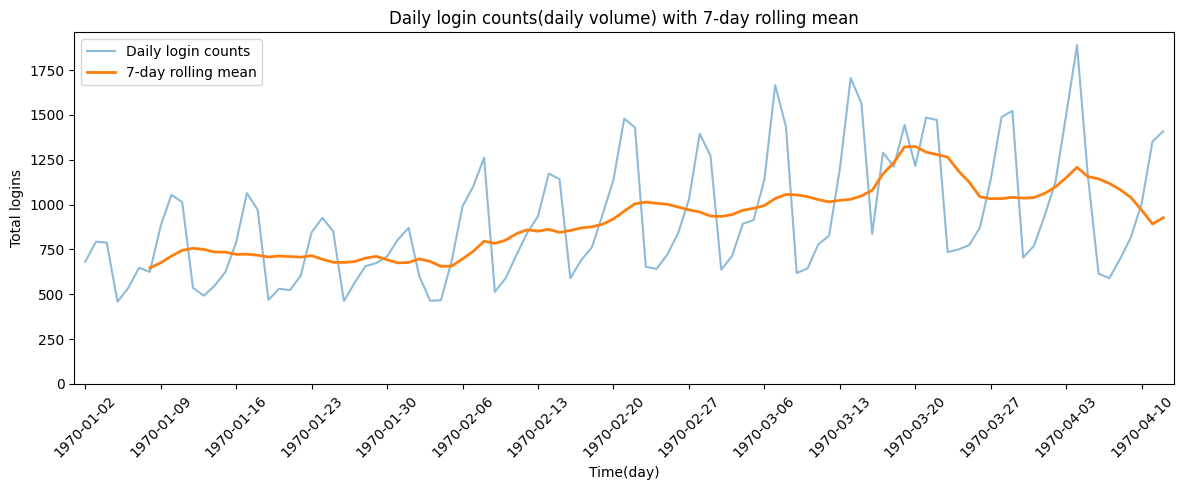

In [1184]:
# Plot Daily login volume and 7-day rolling mean
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(daily_full, alpha=0.5, label='Daily login counts')
ax.plot(rolling_weekly_mean, linewidth=2, label='7-day rolling mean')

ax.set_title("Daily login counts(daily volume) with 7-day rolling mean")
ax.set_xlabel('Time(day)')
ax.set_ylabel("Total logins")

# Force weekly ticks
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.set_xlim(daily_agg.index.min(), daily_agg.index.max())
ax.set_ylim(bottom=0)

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Observations(over time) - Macro

- There is a clear upward trend from early January to early April. The 7-day rolling mean demonstrates sustained demand growth.
- The plot exhibits increasing range of weekly fluctuations over time. Peak-trough range increases as baseline increases; in other words, variance scales with demand
- The time-series exhibits strong weekly pattern(seasonality) evident in the repeating 7 day cycle of peaks and troughs.

##### Login demand throughout the day

In [1185]:
# Average demand for each 15 minute slot
intra_day_avg = login_15_min_intervals.groupby(login_15_min_intervals.index.time).mean()
intra_day_avg.index = pd.to_datetime(intra_day_avg.index.astype(str), format='%H:%M:%S')
intra_day_avg

1900-01-01 00:00:00    14.107843
1900-01-01 00:15:00    15.166667
1900-01-01 00:30:00    14.950980
1900-01-01 00:45:00    14.529412
1900-01-01 01:00:00    15.186275
                         ...    
1900-01-01 22:45:00    16.049020
1900-01-01 23:00:00    15.421569
1900-01-01 23:15:00    15.215686
1900-01-01 23:30:00    14.274510
1900-01-01 23:45:00    14.480392
Length: 96, dtype: float64

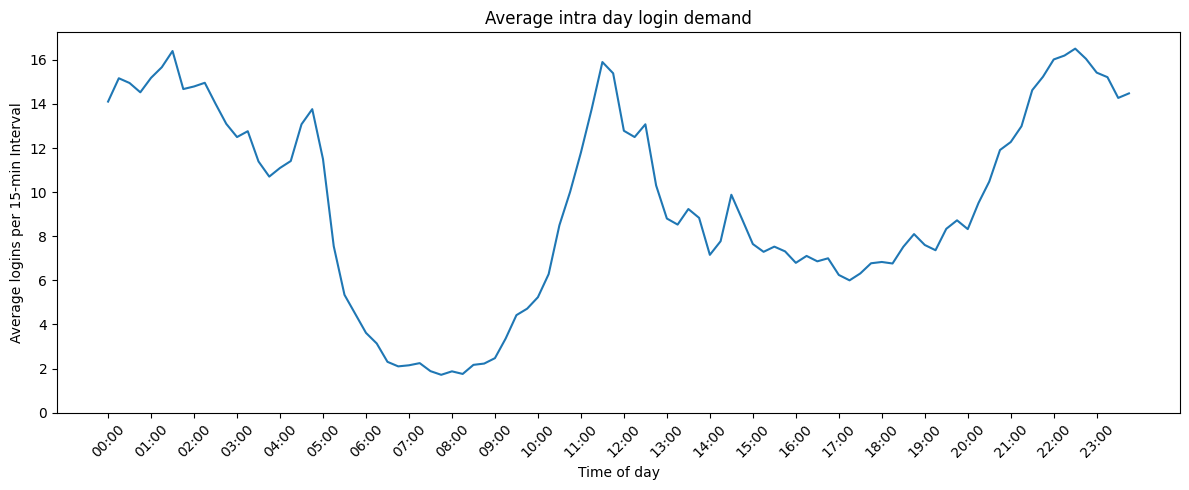

In [1186]:
# plot
plt.figure(figsize=(12,5))
plt.plot(range(len(intra_day_avg)), intra_day_avg.values)
plt.title("Average intra day login demand")
plt.xlabel("Time of day")
plt.ylabel("Average logins per 15-min Interval")
plt.ylim(bottom=0)

tick_positions = range(0, 96, 4)
tick_labels = [intra_day_avg.index[i].strftime('%H:%M') for i in tick_positions]

plt.xticks(tick_positions, tick_labels, rotation=45)

plt.tight_layout()
plt.show()

#### Observations(daily cycle) - Intraday
- On average, demand remains reklatively elevated during late night hours(12AM - 2AM) before declining sharply in the morning.
- Demand is at its lowest between 6AM and 8 AM
- Demand then picks up after 9AM and peaks around 11AM before dropping steadily after 12ish AM
- Another peak happens between approximately 8PM and 10 PM

Overall, the pattern in the intra day login count plot above indicates high engagement during late evening hours and around midday. User engagement is lowest during morning hours. 

## Part 2. Experiment and metrics design

#### a. Metric design
The experiment's objective is to encourage driver partners to operate in both cities(change driver behavior) by reimbursing toll cost(financial barrier).

Success metric:

- Percentage of active drivers serving both cities in a given week.

Definition:

- A driver is considered to have served both cities if they complete trips in both Gotham and Metropolis during a given week(primarily weekdays).
- City operators could impose a minimum threshold(e.g driver completed more than 5 trips in both Gotham and Metropolis during weekdays) to ensure meaningful cross-city participation rather than one-off trips.

The experiment will be considered successful if the multi-city driver share is significantly higher in the treatment group(toll reimbursement) compared to the control group(no reimbursement).

#### b. Experiment design

Goal: measure whether toll reimbursement increases the share of drivers who serve both cities(multi-city drivers).

Design: Implement a driver-level randomized controlled trial (RCT) to evaluate the effectiveness of this intervention(toll reimbursement)

Implementation steps:

Pool selection(ensure relevance)

- Include active drivers who primarily operate in both cities recently(pick historical horizon, maybe last 3 weeks)
- Exclude drivers in programs that reimburse toll costs and those that operate on atypical dispatch schedules

Randomize into control and treatment groups

- Randomly assign eligible drivers to two groups: control group(toll will not be reimbursed) and treatment group(toll will be reimbursed)
- Ensure balanced randomization based on driver patterns such as per-week activity, primary city, time-of-day pattern(day vs night drivers)
  
Execution

- Inform drivers in treatment group of toll cost reimbursement changes and rules
- Run the experiment long enough to cover mutliple weeks

Measurement

- Compute success metric weekly; percentage of active drivers who complete trips in both cities(optionally with a minimum threshold)

#### c. Statistical test

- Use a two-proportion z-test to compare the share of multi-city drivers in the treatment and control groups.

Pt = proportion of multi-city drivers in treatment
Pc = proportion of multi-city drivers in control

Null hypothesis
Toll reimbursement has no effect on cross-city driver participation (the proportion of drivers serving both cities is equal in treatment and control) 

i.e Pt = Pc

Alternative hypotheis
Toll reimbursement increases cross-city participation, meaning the treatment group has a higher multi-city driver share than the control group 

i.e Pt > Pc

The two-proportion z-test evaluates whether the observed difference (Pt - Pc) is large enough to reject the null hypothesis. If the resulting p-value is below the chosen significance level (e.g 0.05), we reject the Null Hypothesis and conclude that toll reimbursement significantly increases cross-city participation.

#### d. Interpretation and reporting

- Observe and report the weekly share of multi-city drivers in both treatment and control groups
- Quantify the change in terms of percentage point lift and number of additional multi-city drivers due to toll reimbursement policy change
- Estimate the overall effect(Pt - Pc) across the whole experiment along with a 95% confidence interval and p-value
  
If the difference is statistically significant(p-value < 0.05) and operationally meaningful(e.g a lift of +8 percentage points vs 0.8 percentage points), then we conclude that toll reimbursement increases cross-city driver participation.

If the difference is not statistally significant, then we fail to reject the null hypothesis. There is insufficient evidence that toll reimbursement influences driver behavior under the tested conditions.

## Part 3. Predictive modeling

Goal: Predict whether or not a user will be active in their 6th month on the system

The data was pulled roughly six months after signup, enabling us to determine whether users were active in their sixth month based on activity in the prior 30 days.

In [1187]:
users_df = pd.read_json('../ultimate_data_challenge.json')

In [1188]:
users_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [1189]:
users_df.shape

(50000, 12)

In [1190]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


#### Data types

In [1191]:
# Fix data types
users_df['signup_date'] = pd.to_datetime(users_df['signup_date'])
users_df['last_trip_date'] = pd.to_datetime(users_df['last_trip_date'])

users_df['city'] = users_df['city'].astype('category')
users_df['phone'] = users_df['phone'].astype('category')

In [1192]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  category      
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  category      
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), category(2), datetime64[ns](2), fl

#### Missing values

In [1193]:
# Missingness
users_df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [1194]:
users_df[users_df['avg_rating_of_driver'].isna()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49984,Winterfell,1,2014-01-26,NaN,1.0,2014-01-26,Android,0.0,False,0.0,3.50,5.0
49985,Astapor,1,2014-01-26,NaN,1.0,2014-02-25,Android,0.0,False,100.0,1.38,5.0
49989,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.00,5.0
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0


In [1195]:
# create a 'no_driver_rating' flag
users_df['no_driver_rating'] = users_df['avg_rating_of_driver'].isna().astype(bool)

# create a 'no_rating_by_driver' flag
users_df['no_rating_by_driver'] = users_df['avg_rating_by_driver'].isna().astype(bool)

# replace missing phone with Unknown before filling
# add category first
users_df['phone'] = users_df['phone'].cat.add_categories('Unknown')
users_df['phone'] = users_df['phone'].fillna('Unknown')

In [1196]:
users_df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                        0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
no_driver_rating             0
no_rating_by_driver          0
dtype: int64

In [1197]:
users_df.describe().T

,count,mean,min,25%,50%,75%,max,std
trips_in_first_30_days,50000.0,2.2782,0.0,0.0,1.0,3.0,125.0,3.792684
signup_date,50000,2014-01-16 13:04:20.352000,2014-01-01 00:00:00,2014-01-09 00:00:00,2014-01-17 00:00:00,2014-01-24 00:00:00,2014-01-31 00:00:00,NaN
avg_rating_of_driver,41878.0,4.601559,1.0,4.3,4.9,5.0,5.0,0.617338
avg_surge,50000.0,1.074764,1.0,1.0,1.0,1.05,8.0,0.222336
last_trip_date,50000,2014-04-19 08:02:04.992000256,2014-01-01 00:00:00,2014-02-14 00:00:00,2014-05-08 00:00:00,2014-06-18 00:00:00,2014-07-01 00:00:00,NaN
surge_pct,50000.0,8.849536,0.0,0.0,0.0,8.6,100.0,19.958811
weekday_pct,50000.0,60.926084,0.0,33.3,66.7,100.0,100.0,37.081503
avg_dist,50000.0,5.796827,0.0,2.42,3.88,6.94,160.96,5.707357
avg_rating_by_driver,49799.0,4.778158,1.0,4.7,5.0,5.0,5.0,0.446652


Notes 

- 'trips_in_first_30_days': mean > median(50%), max is much higher, potentially right-skewed(outliers)

- 'avg_rating_of_driver': mean slightly lower than median, most users rate drivers 4-5

- 'avg_surge': most riders experience little to no surge; mean close to median, maybe some outliers

- 'surge_pct': most riders experience little to no surge

- 'weekday_pct': most riders are active on weekdays

- 'avg_dist': 160 max is quite large, outlier maybe

- 'avg_rating_by_driver': clustered around 5 rating

**Holding off on filling numeric columns until further distribution analysis and modeling 

#### Create retention flag
A user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

In [1198]:
# we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
users_df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

The data pull date can be approximated using the maximum trip date observed in the dataset, since no trip activity occurs beyond the extraction point.

In [1199]:
users_df['retained'] = (users_df['last_trip_date'].max() - users_df['last_trip_date']).dt.days <= 30
users_df['retained'] = users_df['retained'].astype('bool')

In [1200]:
users_df.signup_date.max()

Timestamp('2014-01-31 00:00:00')

In [1201]:
# Retention percentage
users_df.retained.value_counts(normalize=True) * 100

retained
False    62.392
True     37.608
Name: proportion, dtype: float64

Approximately 62% of users are non-retained in the 30 days preceeding the data collection date, while 38% of users are retained.

#### Exploratory Data Analysis

#### Categorical Features - Retention Countplots

In [1202]:
cat_columns = users_df.select_dtypes(include=['category']).columns

In [1203]:
for col in cat_columns:
    print("\n", col)
    print(pd.crosstab(users_df[col], users_df['retained'], normalize='index'))



 city
retained           False     True 
city                              
Astapor         0.744285  0.255715
King's Landing  0.371866  0.628134
Winterfell      0.648055  0.351945

 phone
retained     False     True 
phone                       
Android   0.790574  0.209426
iPhone    0.551067  0.448933
Unknown   0.664141  0.335859


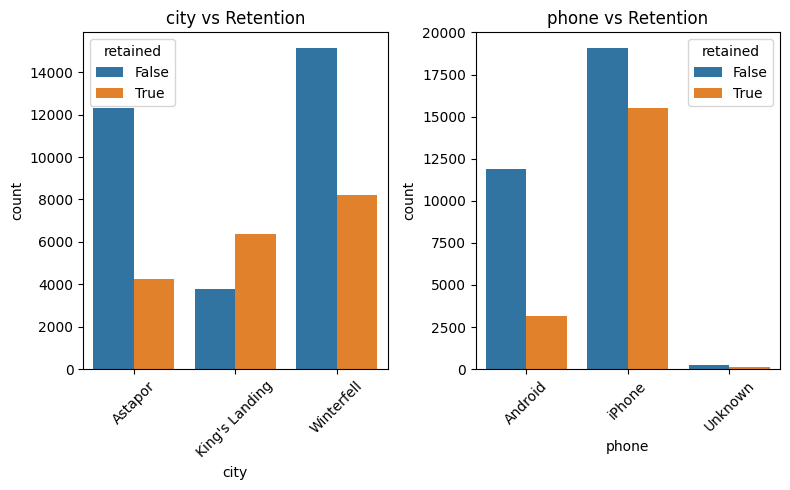

In [1204]:
fig, ax = plt.subplots(1, len(cat_columns), figsize=(8, 5))
for ax, col in zip(ax, cat_columns):
    sns.countplot(data=users_df, x=col, hue='retained', ax=ax)
    ax.set_title(f"{col} vs Retention")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- City


Retention varies significantly by city.
King’s Landing users retain at ~63%, compared to ~26% in Astapor and ~35% in Winterfell, indicating strong geographic differences in user engagement.

- Phone Type


iPhone users exhibit substantially higher retention rates(more than double) compared to Android users suggesting device type may be strongly associated with long-term user engagement.

#### Numeric Features - Retention Distributions

In [1205]:
num_cols = users_df.select_dtypes(include=["int64", "float64"]).columns
num_cols

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'],
      dtype='object')

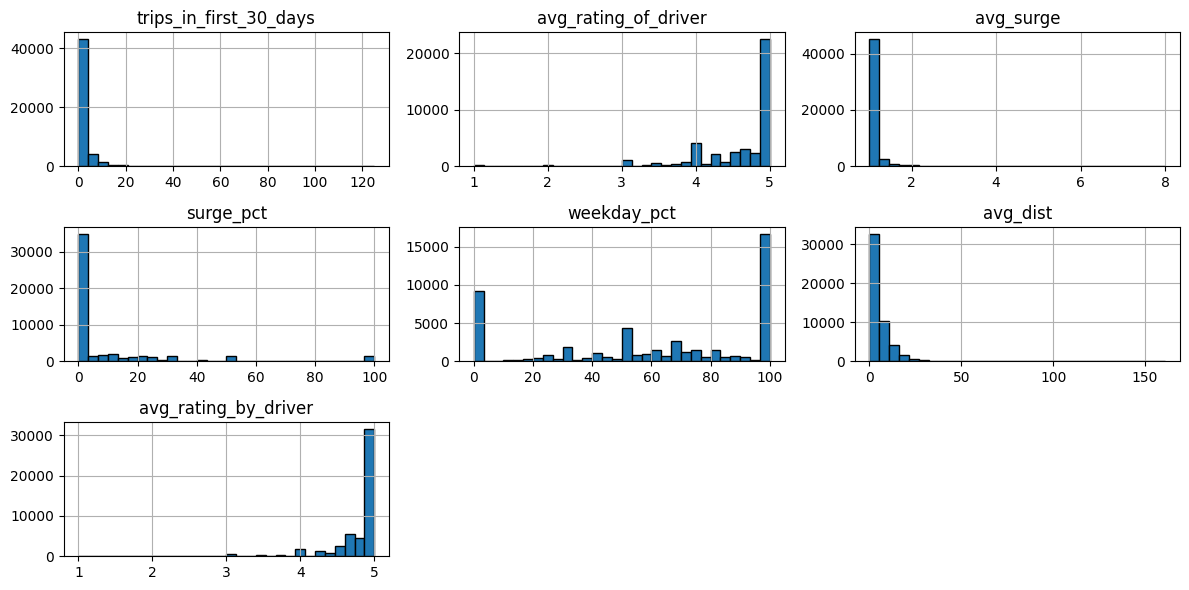

In [1206]:
users_df[num_cols].hist(figsize=(12,6), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

- Skeweness

'trips_in_first_30_days', 'avg_dist', 'surge_pct'

These variables exhibit strong right skew, with a large concentration of users at lower values and a long tail extending toward higher values. A relatively small subset of users shows substantially higher activity levels.

- Zero-inflated distributions

'surge_pct', 'avg_surge', 'trips_in_first_30_days'

These variables display a large spike at zero, indicating a large share of users have zero or near-zero values for these variables.

- Low variance

'avg_rating_of_driver', 'avg_rating_by_driver', 'avg_surge'

These variables are tightly clustered within a narrow value range. Rating variables are concentrated near the upper bound of their scale, while avg_surge is heavily concentrated near 1.

- Bi-modal

'weekday_pct'

This variable displays two distinct concentrations near 0% and 100%, indicating two distinct usage patterns.

#### Retained vs non-retained users

Do retained users historically engage more in their first 30 days compared to non-retained users?

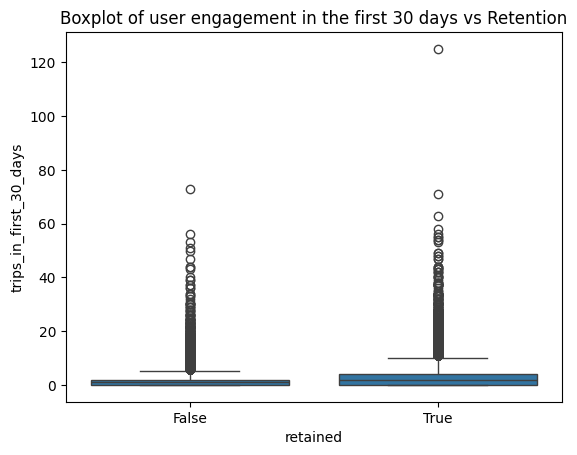

In [1207]:
sns.boxplot(data=users_df, x="retained", y="trips_in_first_30_days")
plt.title('Boxplot of user engagement in the first 30 days vs Retention')
plt.show()

The distribution of trips in the first 30 days is right-skewed for both retained and non-retained users. Retained users exhibit a higher median and a wider interquartile range, indicating generally higher early engagement than non-retained users.

Do active users exhibit different weekday vs weekend patterns?

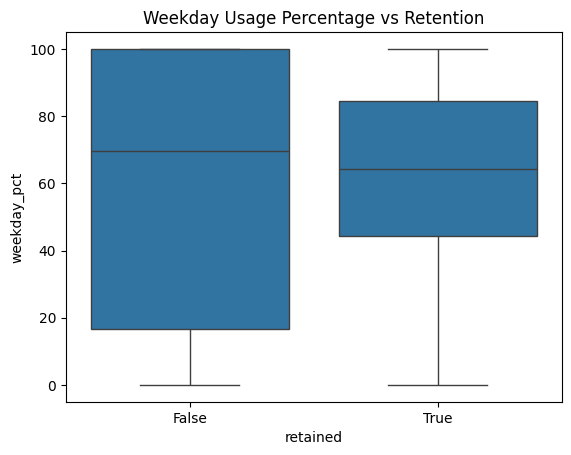

In [1208]:
sns.boxplot(data=users_df, x="retained", y="weekday_pct")
plt.title('Weekday Usage Percentage vs Retention')
plt.show()

Weekday usage percentages are mostly alike for retained and non-retained users. Retained users seem to be a bit more concentrated in mid-to-high weekday usage levels. However, the distributions overlap significantly indicating similar behavior on weekdays and weekends for both groups.

### Model

#### Feature prep
- Log transform heavily skewed and zero-heavy variables

In [1209]:
users_df["log_trips_30"] = np.log1p(users_df["trips_in_first_30_days"])
users_df["log_avg_dist"] = np.log1p(users_df["avg_dist"])
users_df["log_surge_pct"] = np.log1p(users_df["surge_pct"])

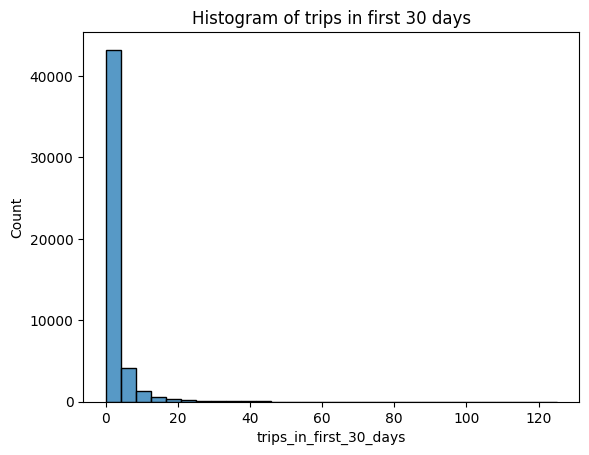

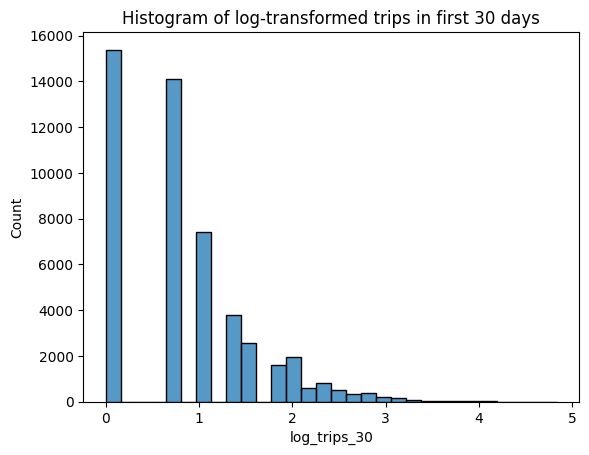

In [1210]:
sns.histplot(users_df["trips_in_first_30_days"], bins=30)
plt.title("Histogram of trips in first 30 days")
plt.show()

sns.histplot(users_df["log_trips_30"], bins=30)
plt.title("Histogram of log-transformed trips in first 30 days")
plt.show()

### Feature Selection Rationale

The following variables were excluded from the predictor set:

- 'trips_in_first_30_days', 'avg_dist', 'surge_pct':

These were replaced with their log-transformed versions to address right-skewed distributions and reduce the influence of extreme values.

- 'retained':
This is the target variable and therefore excluded from the feature set.

- 'signup_date', 'last_trip_date':

These are date fields and are not used directly as predictors. Additionally, last_trip_date is tied to the retention definition and could introduce data leakage.

In [1211]:
exclude_cols = ['trips_in_first_30_days', 'avg_dist', 'surge_pct', 'retained', 'signup_date', 'last_trip_date']
predictors = [c for c in users_df.columns if c not in exclude_cols] 
sorted(predictors)

['avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'city',
 'log_avg_dist',
 'log_surge_pct',
 'log_trips_30',
 'no_driver_rating',
 'no_rating_by_driver',
 'phone',
 'ultimate_black_user',
 'weekday_pct']

In [1212]:
# Define X, y
X = users_df[predictors].copy()
y = users_df['retained'].astype(int)

In [1213]:
cat_columns = list(cat_columns)
cat_columns

['city', 'phone']

In [1214]:
X = pd.get_dummies(X, columns=cat_columns, drop_first=True)
X.head()

,avg_rating_of_driver,avg_surge,ultimate_black_user,weekday_pct,avg_rating_by_driver,no_driver_rating,no_rating_by_driver,log_trips_30,log_avg_dist,log_surge_pct,city_King's Landing,city_Winterfell,phone_iPhone,phone_Unknown
0,4.7,1.10,True,46.2,5.0,False,False,1.609438,1.541159,2.797281,True,False,True,False
1,5.0,1.00,False,50.0,5.0,False,False,0.000000,2.225704,0.000000,False,False,False,False
2,4.3,1.00,False,100.0,5.0,False,False,1.386294,0.570980,0.000000,False,False,True,False
3,4.6,1.14,True,80.0,4.9,False,False,2.302585,1.211941,3.044522,True,False,True,False
4,4.4,1.19,False,82.4,4.9,False,False,2.708050,1.418277,2.549445,False,True,False,False


In [1215]:
numeric_cols = X.select_dtypes(include=['int', 'float']).columns
binary_cols = X.select_dtypes(include=['bool', 'category']).columns
numeric_cols

Index(['avg_rating_of_driver', 'avg_surge', 'weekday_pct',
       'avg_rating_by_driver', 'log_trips_30', 'log_avg_dist',
       'log_surge_pct'],
      dtype='object')

In [1216]:
# Convert bool to int
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [1217]:
X.head()

,avg_rating_of_driver,avg_surge,ultimate_black_user,weekday_pct,avg_rating_by_driver,no_driver_rating,no_rating_by_driver,log_trips_30,log_avg_dist,log_surge_pct,city_King's Landing,city_Winterfell,phone_iPhone,phone_Unknown
0,4.7,1.10,1,46.2,5.0,0,0,1.609438,1.541159,2.797281,1,0,1,0
1,5.0,1.00,0,50.0,5.0,0,0,0.000000,2.225704,0.000000,0,0,0,0
2,4.3,1.00,0,100.0,5.0,0,0,1.386294,0.570980,0.000000,0,0,1,0
3,4.6,1.14,1,80.0,4.9,0,0,2.302585,1.211941,3.044522,1,0,1,0
4,4.4,1.19,0,82.4,4.9,0,0,2.708050,1.418277,2.549445,0,1,0,0


In [1218]:
X.isna().sum()

avg_rating_of_driver    8122
avg_surge                  0
ultimate_black_user        0
weekday_pct                0
avg_rating_by_driver     201
no_driver_rating           0
no_rating_by_driver        0
log_trips_30               0
log_avg_dist               0
log_surge_pct              0
city_King's Landing        0
city_Winterfell            0
phone_iPhone               0
phone_Unknown              0
dtype: int64

In [1219]:
# Fill missing ratings with 0
X["avg_rating_of_driver"] = X["avg_rating_of_driver"].fillna(0)
X["avg_rating_by_driver"] = X["avg_rating_by_driver"].fillna(0)

In [1220]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [1221]:
# Scale numeric cols
scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [1222]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [1223]:
# evaluate on test
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [1228]:
# Metrics
print("Model perf metrics")
print(f"Accuracy score  : {accuracy_score(y_test, y_pred)}")
print(f"Precision score : {precision_score(y_test, y_pred)}")
print(f"Recall score    : {recall_score(y_test, y_pred)}")
print(f"F1 score        : {f1_score(y_test, y_pred)}")
print(f"ROC-AUC         : {roc_auc_score(y_test, y_prob)}")

Model perf metrics
Accuracy score  : 0.7313
Precision score : 0.6766447368421052
Recall score    : 0.5469290082424887
F1 score        : 0.6049110424937509
ROC-AUC         : 0.7729431291761615


In [1225]:
# Metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      6239
           1       0.68      0.55      0.60      3761

    accuracy                           0.73     10000
   macro avg       0.72      0.69      0.70     10000
weighted avg       0.73      0.73      0.72     10000

ROC-AUC: 0.7729431291761615


### Feature Importance / Coefficient Interpretation

In [1229]:
coef_df = pd.DataFrame({"feature": X_train.columns, "coeffs": model.coef_[0]}).sort_values(by="coeffs", ascending=False)
coef_df

,feature,coeffs
10,city_King's Landing,1.731410
12,phone_iPhone,1.057283
2,ultimate_black_user,0.906498
9,log_surge_pct,0.634987
11,city_Winterfell,0.619728
13,phone_Unknown,0.407584
7,log_trips_30,0.211173
3,weekday_pct,0.023006
8,log_avg_dist,-0.056852
4,avg_rating_by_driver,-0.107171


### Coefficients interpretation

- Positive coefficient increases the likelihood of retention

e.g 'log_trips_30', coeff: +0.21; one standard deviation increase in early trips is associated with a higher likelihood of retention, holding other factors constant

- Negative coefficient decreases the likelihood of retention

e.g 'avg_surge', coeff: -0.49; one standard deviation increase in average surge is associated with a lower likelihood of retention, holding other factors constant

- Larger absolute magnitude indicates stronger influence (for scaled numeric predictors)

e.g 'no_rating_by_driver', coeff: -1.27; users with no rating are substantially less likely to be retained, holding other factors constant

- Categorical variables are interpreted relative to the baseline (dropped) category

e.g 'city_King's Landing', coeff: +1.73; users in King’s Landing are more likely to be retained compared to the baseline city (Astapor), holding other factors constant

### Interpretation

- Precision (retained = 1) approx. 0.68; 32% False Positives

32% of users predicted as retained are actually non-retained users

- Recall (retained = 1) approx. 0.55; 45% False Negatives

45% of truly retained users were incorrectly predicted as non-retained

- F1 score (retained = 1) approx. 0.60; harmonic mean of Precision and Recall

The F1 score reflects moderate balance between precision and recall at the default classification threshold (0.5). Because recall is lower than precision, the model tends to avoid predicting retention and consequently misses a meaningful portion of retained users.

- ROC-AUC score (retained = 1) approx. 0.77

If we randomly select one retained and one non-retained user, the model assigns a higher predicted probability to the retained user approximately 77% of the time. This indicates strong discriminatory performance and substantially better results than random guessing (AUC = 0.50).

Objective alignment

The goal was to build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system.

With an ROC-AUC of approximately 0.77, the model demonstrates meaningful ability to distinguish between users who will remain active and those who will not.

Approach

I chose logistic regression beacuse the problem is a binary classification(retained vs non-retained) task. It serves as a strong and interpretable baseline before introducing more complex models.

Feature engineering choices
- Log-transformed right-tailed features to reduce the influence of extreme values
- Added missingness flags/indicators to preserve potential signal from features with missing data.
- Dropped 'last_trip_date' to avoid leakage; the retention flag is derived from this feature

Considerations and Concerns

- Tree-based models(e.g Random Forests) could potentially improve predictive performance, though they reduce interpretability and may increase overfitting risk
- Classification threshold can be tuned depending on business priorities (precision vs recall tradeoff)
- Additional feature engineering, including interaction features, could improve predictive power
- Class weighting may improve recall for retained users as the model is somewhat conservative

### Business Application

1. Since higher trip activity in the first 30 days is associated with better retention, Ultimate could encourage early usage through onboarding incentives or promotions like first month ride promotions.
2. Users showing low early activity can be identified and targeted with proactive re-engagement campaigns
3. Observed differences across cities and user segments can inform more personalized marketing and retention strategies.